In [1]:
#Mounting google drive to upload the data.
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


# Evaluation of the Model

Import saved model from the path and infer the predictions for test image.

In [10]:
#Import libraries
import torch
from PIL import Image
import numpy as np
import cv2
import json

In [16]:
#Test the model
weights_path = "/content/drive/MyDrive/person_car/data_train/weights/best.pt"
thresh_conf = 0.25
model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-30 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 290 layers, 20856975 parameters, 0 gradients
Adding AutoShape... 


In [17]:
#Read an image and after resizing into 416x416, run an inference.

img = Image.open('/content/drive/MyDrive/person_car/data_train/val/images/image_000002222.jpg')
results = model(img, size=416)

df = json.loads(results.pandas().xyxy[0].to_json(orient="records"))
print(df)

[{'xmin': 25.3109607697, 'ymin': 83.5916671753, 'xmax': 922.9839477539, 'ymax': 615.6463623047, 'confidence': 0.8877874017, 'class': 1, 'name': 'car'}, {'xmin': 565.8369140625, 'ymin': 20.3698444366, 'xmax': 745.2643432617, 'ymax': 187.5073547363, 'confidence': 0.7426794767, 'class': 0, 'name': 'person'}, {'xmin': 380.0170288086, 'ymin': 90.8069381714, 'xmax': 530.7071533203, 'ymax': 137.2038269043, 'confidence': 0.594319284, 'class': 1, 'name': 'car'}]


In [18]:
#Plotting all the predictions on the given image
cv_img = np.array(img)
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_RGB2BGR)
for each_d in df:
  print(each_d)
  xmin = int(each_d['xmin'])
  ymin = int(each_d['ymin'])
  xmax = int(each_d['xmax'])
  ymax = int(each_d['ymax'])
  conf = each_d['confidence']
  cls_name = each_d['name']
  if conf > thresh_conf: #Ignore the pred which are lesser than the threshold''
    out_img = cv2.rectangle(cv_img, (xmin,ymin), (xmax, ymax), (255,0,0), 2)
    out_img = cv2.putText(out_img, cls_name, (xmin+10, ymin- 10), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

{'xmin': 25.3109607697, 'ymin': 83.5916671753, 'xmax': 922.9839477539, 'ymax': 615.6463623047, 'confidence': 0.8877874017, 'class': 1, 'name': 'car'}
{'xmin': 565.8369140625, 'ymin': 20.3698444366, 'xmax': 745.2643432617, 'ymax': 187.5073547363, 'confidence': 0.7426794767, 'class': 0, 'name': 'person'}
{'xmin': 380.0170288086, 'ymin': 90.8069381714, 'xmax': 530.7071533203, 'ymax': 137.2038269043, 'confidence': 0.594319284, 'class': 1, 'name': 'car'}


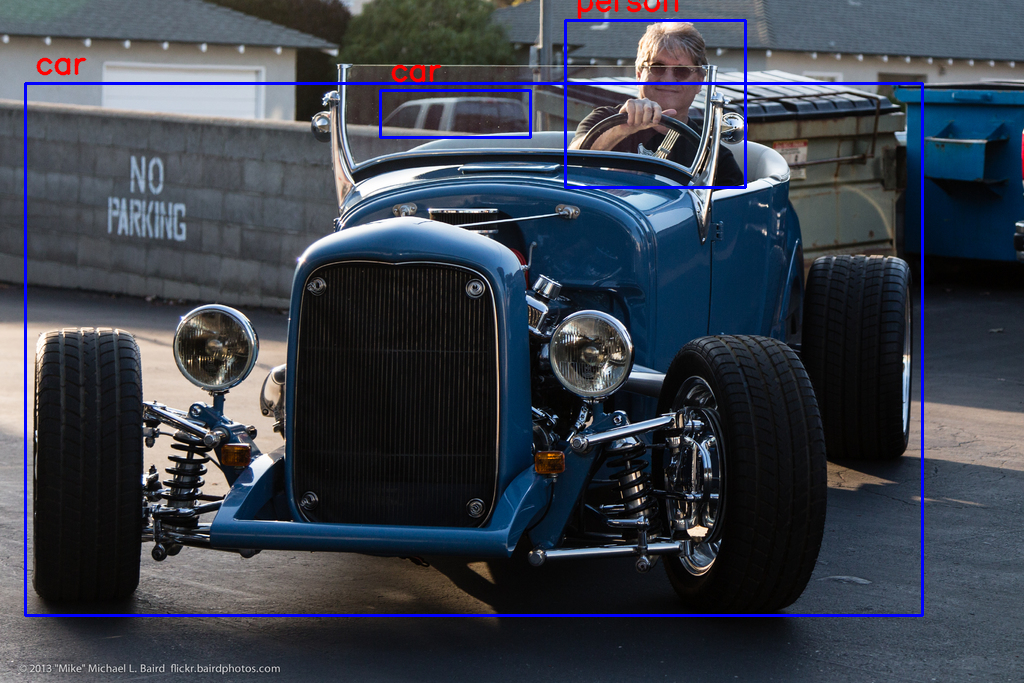

In [19]:
from google.colab.patches import cv2_imshow
cv2_imshow(out_img)